In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings('ignore')

# Train Data

In [2]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\house-prices-advanced-regression-techniques\train.csv")


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Full names of Dataset columns:**


SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.\
MSSubClass: The building class\
MSZoning: The general zoning classification\
LotFrontage: Linear feet of street connected to property\
LotArea: Lot size in square feet\
Street: Type of road access\
Alley: Type of alley access\
LotShape: General shape of property\
LandContour: Flatness of the property\
Utilities: Type of utilities available\
LotConfig: Lot configuration\
LandSlope: Slope of property\
Neighborhood: Physical locations within Ames city limits\
Condition1: Proximity to main road or railroad\
Condition2: Proximity to main road or railroad (if a second is present)\
BldgType: Type of dwelling\
HouseStyle: Style of dwelling\
OverallQual: Overall material and finish quality\
OverallCond: Overall condition rating\
YearBuilt: Original construction date\
YearRemodAdd: Remodel date\
RoofStyle: Type of roof\
RoofMatl: Roof material\
Exterior1st: Exterior covering on house\
Exterior2nd: Exterior covering on house (if more than one material)\
MasVnrType: Masonry veneer type\
MasVnrArea: Masonry veneer area in square feet\
ExterQual: Exterior material quality\
ExterCond: Present condition of the material on the exterior\
Foundation: Type of foundation\
BsmtQual: Height of the basement\
BsmtCond: General condition of the basement\
BsmtExposure: Walkout or garden level basement walls\
BsmtFinType1: Quality of basement finished area\
BsmtFinSF1: Type 1 finished square feet\
BsmtFinType2: Quality of second finished area (if present)\
BsmtFinSF2: Type 2 finished square feet\
BsmtUnfSF: Unfinished square feet of basement area\
TotalBsmtSF: Total square feet of basement area\
Heating: Type of heating\
HeatingQC: Heating quality and condition\
CentralAir: Central air conditioning\
Electrical: Electrical system\
1stFlrSF: First Floor square feet\
2ndFlrSF: Second floor square feet\
LowQualFinSF: Low quality finished square feet (all floors)\
GrLivArea: Above grade (ground) living area square feet\
BsmtFullBath: Basement full bathrooms\
BsmtHalfBath: Basement half bathrooms\
FullBath: Full bathrooms above grade\
HalfBath: Half baths above grade\
Bedroom: Number of bedrooms above basement level\
Kitchen: Number of kitchens\
KitchenQual: Kitchen quality\
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)\
Functional: Home functionality rating\
Fireplaces: Number of fireplaces\
FireplaceQu: Fireplace quality\
GarageType: Garage location\
GarageYrBlt: Year garage was built\
GarageFinish: Interior finish of the garage\
GarageCars: Size of garage in car capacity\
GarageArea: Size of garage in square feet\
GarageQual: Garage quality\
GarageCond: Garage condition\
PavedDrive: Paved driveway\
WoodDeckSF: Wood deck area in square feet\
OpenPorchSF: Open porch area in square feet\
EnclosedPorch: Enclosed porch area in square feet\
3SsnPorch: Three season porch area in square feet\
ScreenPorch: Screen porch area in square feet\
PoolArea: Pool area in square feet\
PoolQC: Pool quality\
Fence: Fence quality\
MiscFeature: Miscellaneous feature not covered in other categories\
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold\
YrSold: Year Sold\
SaleType: Type of sale\
SaleCondition: Condition of sale

In [4]:
#lets check the information and columns about this data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df2 = pd.read_csv(r"C:\Users\Administrator\Downloads\house-prices-advanced-regression-techniques\sample_submission.csv")
df2

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [8]:
len(df)

1460

In [18]:
df = df.drop('PoolQC',axis=1) 

In [19]:
df = df.drop('Fence',axis=1) 

In [20]:
df = df.drop('MiscFeature',axis=1) 

In [21]:
df = df.drop('Alley',axis=1) 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Feature Selection

In [26]:
dfc = df[['Id','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd'
,'YearBuilt','LotArea','SalePrice']]  
dfc

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,LotArea,SalePrice
0,1,7,1710,2,548,856,856,2,8,2003,8450,208500
1,2,6,1262,2,460,1262,1262,2,6,1976,9600,181500
2,3,7,1786,2,608,920,920,2,6,2001,11250,223500
3,4,7,1717,3,642,756,961,1,7,1915,9550,140000
4,5,8,2198,3,836,1145,1145,2,9,2000,14260,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,6,1647,2,460,953,953,2,7,1999,7917,175000
1456,1457,6,2073,2,500,1542,2073,2,7,1978,13175,210000
1457,1458,7,2340,1,252,1152,1188,2,9,1941,9042,266500
1458,1459,5,1078,1,240,1078,1078,1,5,1950,9717,142125


<Axes: >

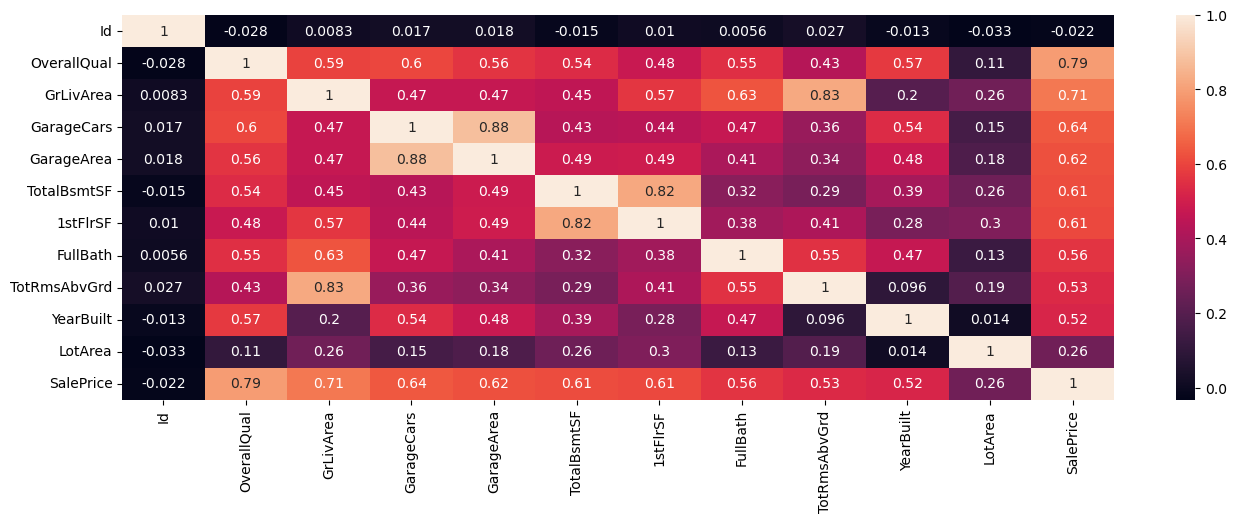

In [27]:
plt.figure(figsize = (16,5))
sns.heatmap(dfc.corr(),annot=True)

Right Skewed Data: More houses with price between 1 million and 3 million 


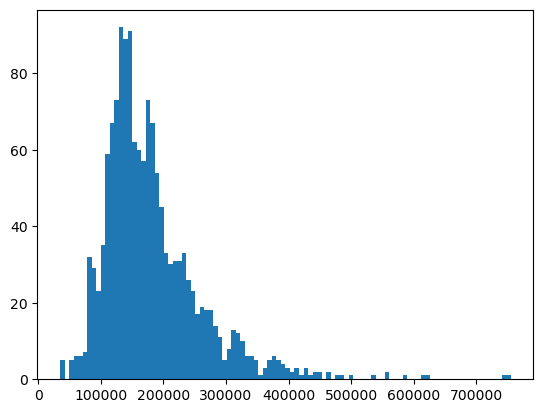

In [28]:
plt.hist(df['SalePrice'],bins=100)
print("Right Skewed Data: More houses with price between 1 million and 3 million ")

## Outliers in Data

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

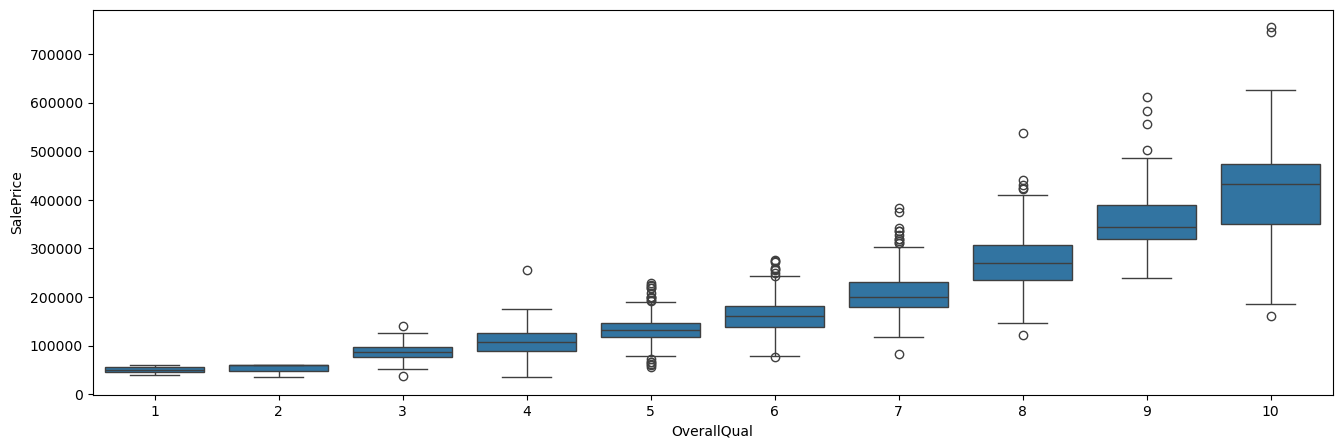

In [29]:
#using box plot
plt.figure(figsize=(16,5))
sns.boxplot(x='OverallQual',y='SalePrice',data=dfc)

## Imputation using sklearn (handling missing values)

In [30]:
from sklearn.impute import KNNImputer

In [31]:
imp = KNNImputer()

In [32]:
imp.fit_transform(dfc)

array([[1.00000e+00, 7.00000e+00, 1.71000e+03, ..., 2.00300e+03,
        8.45000e+03, 2.08500e+05],
       [2.00000e+00, 6.00000e+00, 1.26200e+03, ..., 1.97600e+03,
        9.60000e+03, 1.81500e+05],
       [3.00000e+00, 7.00000e+00, 1.78600e+03, ..., 2.00100e+03,
        1.12500e+04, 2.23500e+05],
       ...,
       [1.45800e+03, 7.00000e+00, 2.34000e+03, ..., 1.94100e+03,
        9.04200e+03, 2.66500e+05],
       [1.45900e+03, 5.00000e+00, 1.07800e+03, ..., 1.95000e+03,
        9.71700e+03, 1.42125e+05],
       [1.46000e+03, 5.00000e+00, 1.25600e+03, ..., 1.96500e+03,
        9.93700e+03, 1.47500e+05]])

In [33]:
print(dfc.isnull().sum())
print("\n\n\nNo missing values")

Id              0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
LotArea         0
SalePrice       0
dtype: int64



No missing values


# Linear Regression

In [34]:
##dividing the dataset into independent and dependent var
X=dfc.iloc[:,:-1]
y=dfc.iloc[:,-1] #TARGET

In [35]:
X

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,LotArea
0,1,7,1710,2,548,856,856,2,8,2003,8450
1,2,6,1262,2,460,1262,1262,2,6,1976,9600
2,3,7,1786,2,608,920,920,2,6,2001,11250
3,4,7,1717,3,642,756,961,1,7,1915,9550
4,5,8,2198,3,836,1145,1145,2,9,2000,14260
...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,6,1647,2,460,953,953,2,7,1999,7917
1456,1457,6,2073,2,500,1542,2073,2,7,1978,13175
1457,1458,7,2340,1,252,1152,1188,2,9,1941,9042
1458,1459,5,1078,1,240,1078,1078,1,5,1950,9717


In [36]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [37]:
#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
#feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lin_reg.fit(X_train, y_train)

LinearRegression()

In [39]:
# predicting the test set results

y_pred = lin_reg.predict(X_test)

Text(0.5, 1.0, 'Scatter chart - Linear regression model')

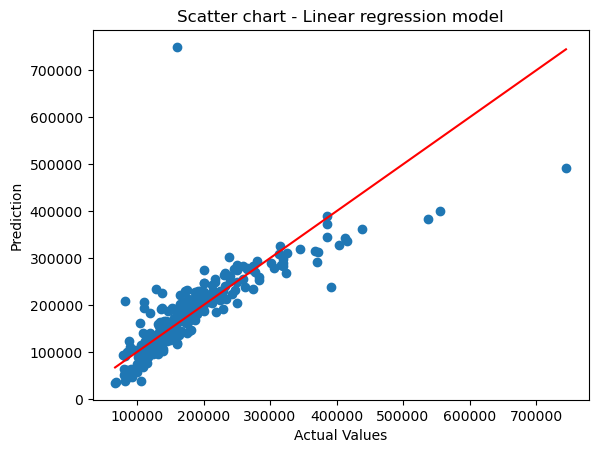

In [41]:
# Plotting Scatter graph to show the prediction

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Prediction')
plt.title('Scatter chart - Linear regression model')
     

In [42]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [43]:
print("New RMSE: ", math.sqrt(mean_squared_error(y_pred, y_test)))

New RMSE:  50045.870840938645


In [44]:
y_pred.size

292

# test data

In [46]:
df1 = pd.read_csv(r"C:\Users\Administrator\Downloads\house-prices-advanced-regression-techniques\test.csv")

In [47]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [49]:
df1 = df1[['Id','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd'
,'YearBuilt','LotArea']]


In [50]:
df1

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,LotArea
0,1461,5,896,1.0,730.0,882.0,896,1,5,1961,11622
1,1462,6,1329,1.0,312.0,1329.0,1329,1,6,1958,14267
2,1463,5,1629,2.0,482.0,928.0,928,2,6,1997,13830
3,1464,6,1604,2.0,470.0,926.0,926,2,7,1998,9978
4,1465,8,1280,2.0,506.0,1280.0,1280,2,5,1992,5005
...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,4,1092,0.0,0.0,546.0,546,1,5,1970,1936
1455,2916,4,1092,1.0,286.0,546.0,546,1,6,1970,1894
1456,2917,5,1224,2.0,576.0,1224.0,1224,1,7,1960,20000
1457,2918,5,970,0.0,0.0,912.0,970,1,6,1992,10441


In [51]:
from sklearn.impute import KNNImputer
imp = KNNImputer()
imp.fit_transform(df1)

array([[1.4610e+03, 5.0000e+00, 8.9600e+02, ..., 5.0000e+00, 1.9610e+03,
        1.1622e+04],
       [1.4620e+03, 6.0000e+00, 1.3290e+03, ..., 6.0000e+00, 1.9580e+03,
        1.4267e+04],
       [1.4630e+03, 5.0000e+00, 1.6290e+03, ..., 6.0000e+00, 1.9970e+03,
        1.3830e+04],
       ...,
       [2.9170e+03, 5.0000e+00, 1.2240e+03, ..., 7.0000e+00, 1.9600e+03,
        2.0000e+04],
       [2.9180e+03, 5.0000e+00, 9.7000e+02, ..., 6.0000e+00, 1.9920e+03,
        1.0441e+04],
       [2.9190e+03, 7.0000e+00, 2.0000e+03, ..., 9.0000e+00, 1.9930e+03,
        9.6270e+03]])

In [52]:
df1[df1['GarageCars'].isnull()]

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,LotArea
1116,2577,5,1828,NaN,NaN,859.0,942,2,6,1923,9060


In [55]:
df1[['GarageCars','GarageArea','TotalBsmtSF']] = df1[['GarageCars','GarageArea','TotalBsmtSF']].fillna(0)

In [56]:
df1.isnull().sum()

Id              0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
LotArea         0
dtype: int64

In [58]:
y_pred1 = lin_reg.predict(df1)
y_pred1

array([1.48164196e+08, 1.81927049e+08, 1.83260161e+08, ...,
       2.18553460e+08, 1.37170034e+08, 1.67988511e+08])

In [59]:
result = pd.DataFrame({
        "Id": range(1461, 2920),
        "SalePrice": y_pred1
    })
result

,Id,SalePrice
0,1461,1.481642e+08
1,1462,1.819270e+08
2,1463,1.832602e+08
3,1464,1.562828e+08
4,1465,1.189474e+08
...,...,...
1454,2915,7.676888e+07
1455,2916,7.890794e+07
1456,2917,2.185535e+08
1457,2918,1.371700e+08
